# imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import pickle
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder

# Helper functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# load data

In [3]:
df5 = pd.read_csv('../data/df4.csv',low_memory=False,parse_dates=['date','competition_since','promo_since'])

In [4]:
df5.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,season
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,2015,7,31,31,2015-07,2008-09-01,84,2015-07-27,0,summer
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,2015,7,31,31,2015-07,2007-11-01,94,2010-03-22,279,summer
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,2015,7,31,31,2015-07,2006-12-01,105,2011-03-28,226,summer
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,...,2015,7,31,31,2015-07,2009-09-01,71,2015-07-27,0,summer
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,2015,7,31,31,2015-07,2015-04-01,4,2015-07-27,0,summer


In [5]:
df5.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month      int64
competition_open_since_year       int64
promo2                            int64
promo2_since_week                 int64
promo2_since_year                 int64
is_promo                          int64
year                              int64
month                             int64
day                               int64
week_of_year                      int64
year_week                        object
competition_since                object
competition_time_month            int64
promo_since                      object
promo_time_week                   int64


In [7]:
num_attribures = df5.select_dtypes(include=['int64','int32','float64'])
cat_attribures = df5.select_dtypes(exclude=['int64','int32','float64','datetime64[ns]'])

# Normalization

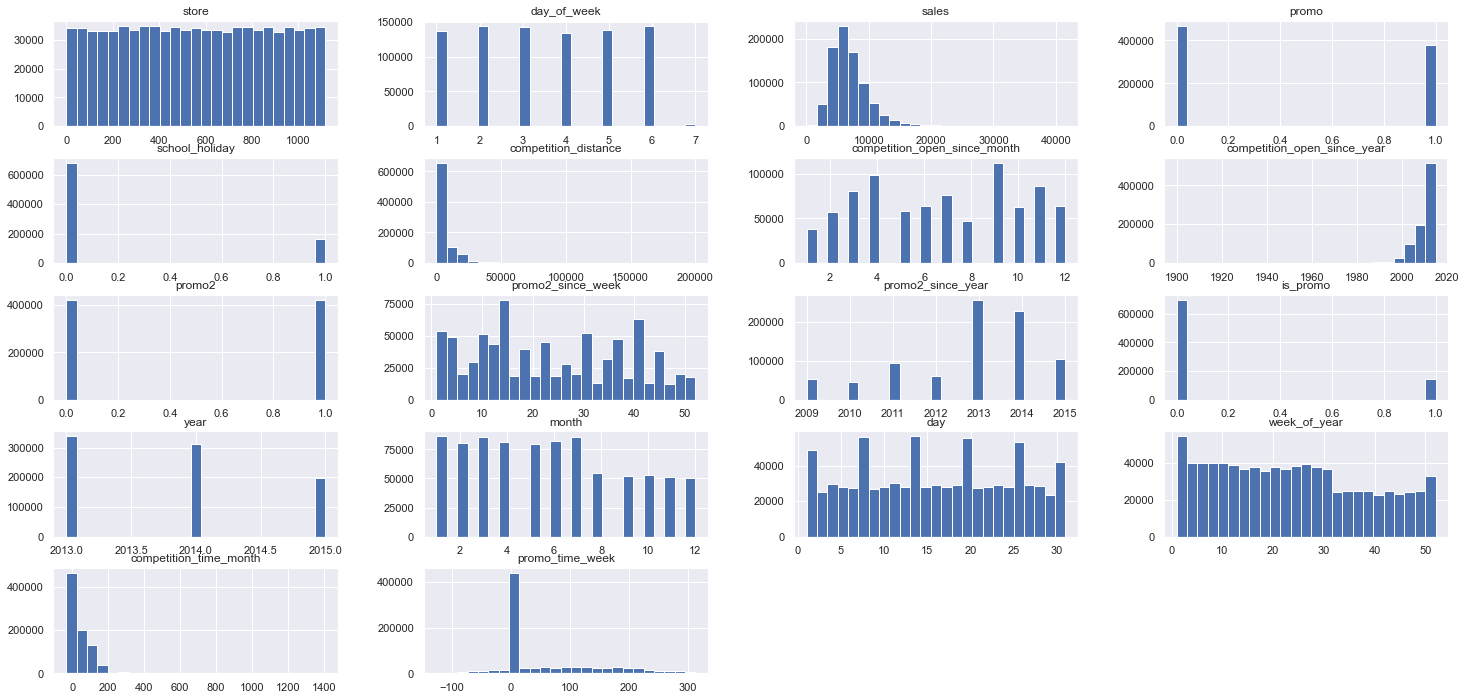

In [8]:
num_attribures.hist(bins=25);

since we have no normally distributed variable, there os no reason to apply any normalization process to them

# Rescaling

In [21]:
rs = RobustScaler()
mms = MinMaxScaler()

# robust Scale
df5['competition_distance'] = rs.fit_transform(df5[['competition_distance']].values)
pickle.dump(rs,open('parameter/rescaling_competition_distance.pkl','wb'))

# robust Scale
df5['competition_ time_month'] = rs.fit_transform(df5[['competition_time_month']].values)
pickle.dump(rs,open('parameter/rescaling_competition_time_month.pkl','wb'))

# min max Scale
df5['promo_time_week'] = mms.fit_transform(df5[['promo_time_week']].values)
pickle.dump(mms,open('parameter/rescaling_promo_time_week.pkl','wb'))

# min max Scale
df5['year'] = mms.fit_transform(df5[['year']].values)
pickle.dump(mms,open('parameter/rescaling_year.pkl','wb'))

# Transformation

## encoding

In [22]:
# state_holiday - one hot encoding
df5 = pd.get_dummies(df5,prefix=['state_holiday'],columns=['state_holiday'])

# store_type - label encoding
le = LabelEncoder()
df5['store_type'] = le.fit_transform(df5['store_type'])
pickle.dump(le,open('parameter/encoding_store_type.pkl','wb'))

# assortment - ordinal encoding
assortment_dict = {'basic':1,'extra':2,'extended':3}
df5['assortment'] = df5['assortment'].map(assortment_dict)

# season - one hot encoding
df5 = pd.get_dummies(df5,prefix=['season'],columns=['season'])

## Response variable transformation

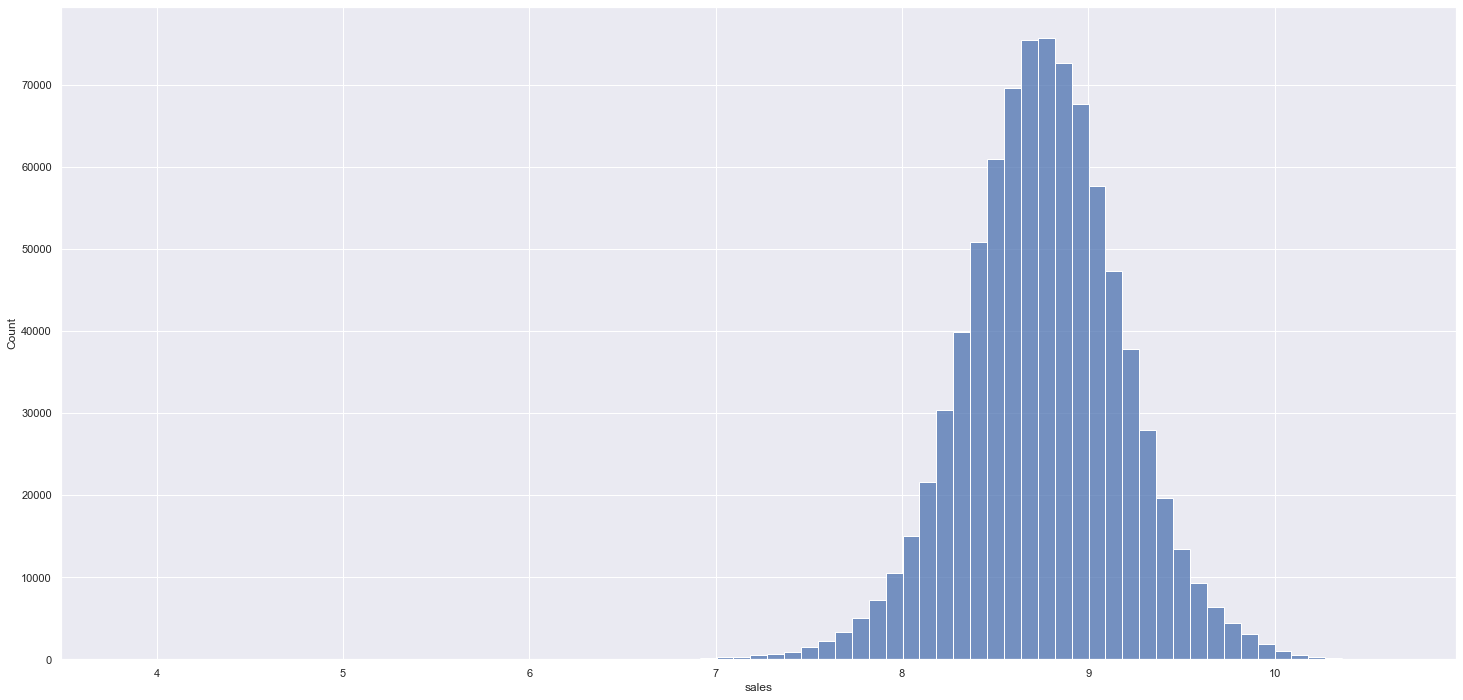

In [32]:
df5['sales'] = np.log(df5['sales'])
sns.histplot(x='sales',data=df5,bins=75);

## Nature transformation

In [33]:
#month
df5['month_sin'] = df5['month'].apply(lambda x: np.sin(x*(2.* np.pi/12)))
df5['month_cos'] = df5['month'].apply(lambda x: np.cos(x*(2.* np.pi/12)))

#day
df5['day_sin'] = df5['day'].apply(lambda x: np.sin(x*(2.* np.pi/31)))
df5['day_cos'] = df5['day'].apply(lambda x: np.cos(x*(2.* np.pi/31)))

#week of year
df5['week_of_year_sin'] = df5['week_of_year'].apply(lambda x: np.sin(x*(2.* np.pi/52)))
df5['week_of_year_cos'] = df5['week_of_year'].apply(lambda x: np.cos(x*(2.* np.pi/52)))

# day of week
df5['day_of_week_sin'] = df5['day_of_week'].apply(lambda x: np.sin(x*(2.* np.pi/7)))
df5['day_of_week_cos'] = df5['day_of_week'].apply(lambda x: np.cos(x*(2.* np.pi/7)))

In [34]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,season_summer,season_winter,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos,day_of_week_sin,day_of_week_cos
0,1,5,2015-07-31,8.568456,1,1,2,1,-0.170968,9,...,1,0,-0.5,-0.866025,-2.449294e-16,1.0,-0.568065,-0.822984,-0.974928,-0.222521
1,2,5,2015-07-31,8.710125,1,1,0,1,-0.283871,11,...,1,0,-0.5,-0.866025,-2.449294e-16,1.0,-0.568065,-0.822984,-0.974928,-0.222521
2,3,5,2015-07-31,9.025696,1,1,0,1,1.903226,12,...,1,0,-0.5,-0.866025,-2.449294e-16,1.0,-0.568065,-0.822984,-0.974928,-0.222521
3,4,5,2015-07-31,9.546455,1,1,2,3,-0.275806,9,...,1,0,-0.5,-0.866025,-2.449294e-16,1.0,-0.568065,-0.822984,-0.974928,-0.222521
4,5,5,2015-07-31,8.480944,1,1,0,1,4.448387,4,...,1,0,-0.5,-0.866025,-2.449294e-16,1.0,-0.568065,-0.822984,-0.974928,-0.222521


In [38]:
df5.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                  float64
promo                                    int64
school_holiday                           int64
store_type                               int32
assortment                               int64
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
is_promo                                 int64
year                                   float64
month                                    int64
day                                      int64
week_of_year                             int64
year_week                               object
competition_since               datetime64[ns]
competition_t

In [35]:
#df5.to_csv('../data/df5.csv',index=False)